In [11]:
library("graphics")
library("ape")
library("ggplot2")
library("RPANDA")
library("phytools")
library("castor")
library("geiger")
library("TESS")
library("TreeSim")
library("thacklr")

On coupe l'abre en 2 pour créer deux sous arbres indépendants.

In [17]:
data(Cetacea)
phylo <- Cetacea

In [18]:
desc1 <- getDescendants(phylo, Ntip(phylo)+1, curr=NULL)[[1]]
desc2 <- getDescendants(phylo, Ntip(phylo)+1, curr=NULL)[[2]]

#print node names of cetacea 
subtree1 <- extract.clade(phylo, desc1, root.edge = 1)
subtree2 <- extract.clade(phylo, desc2, root.edge = 1)

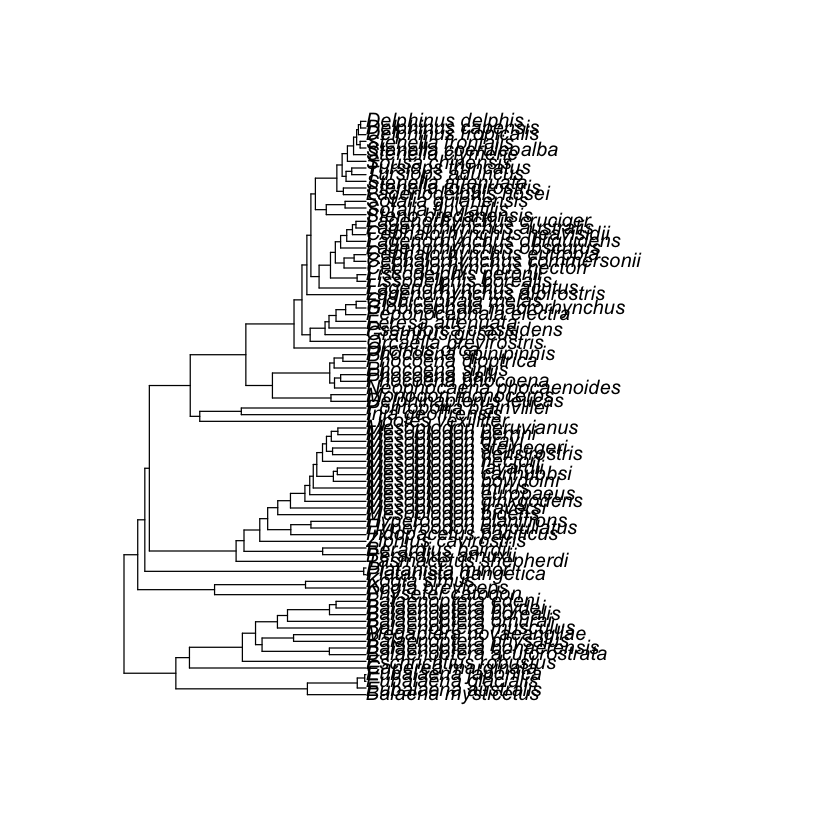

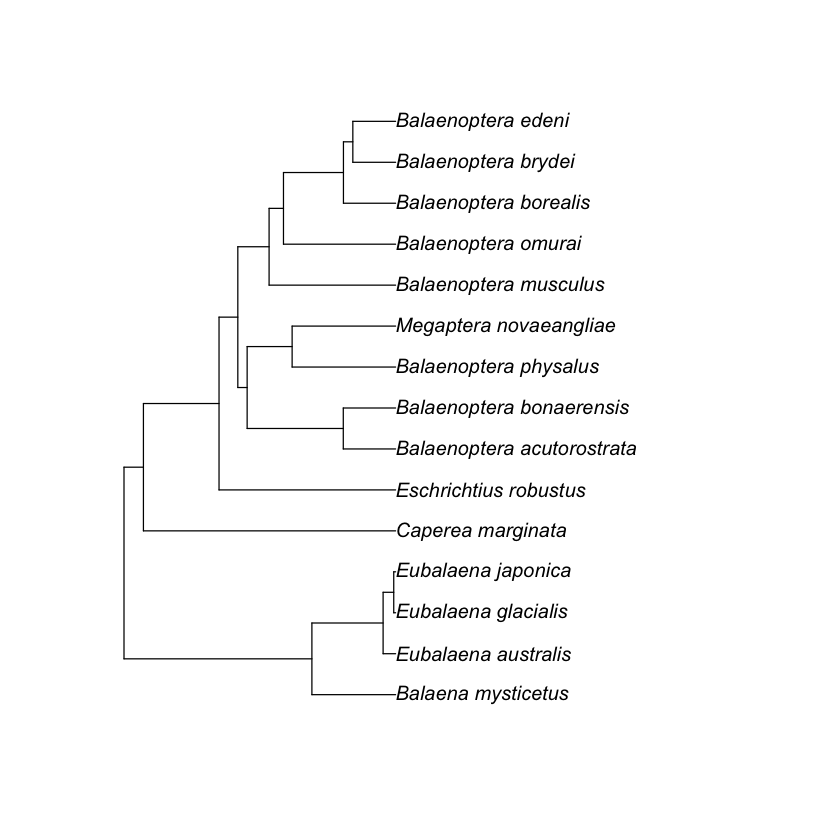

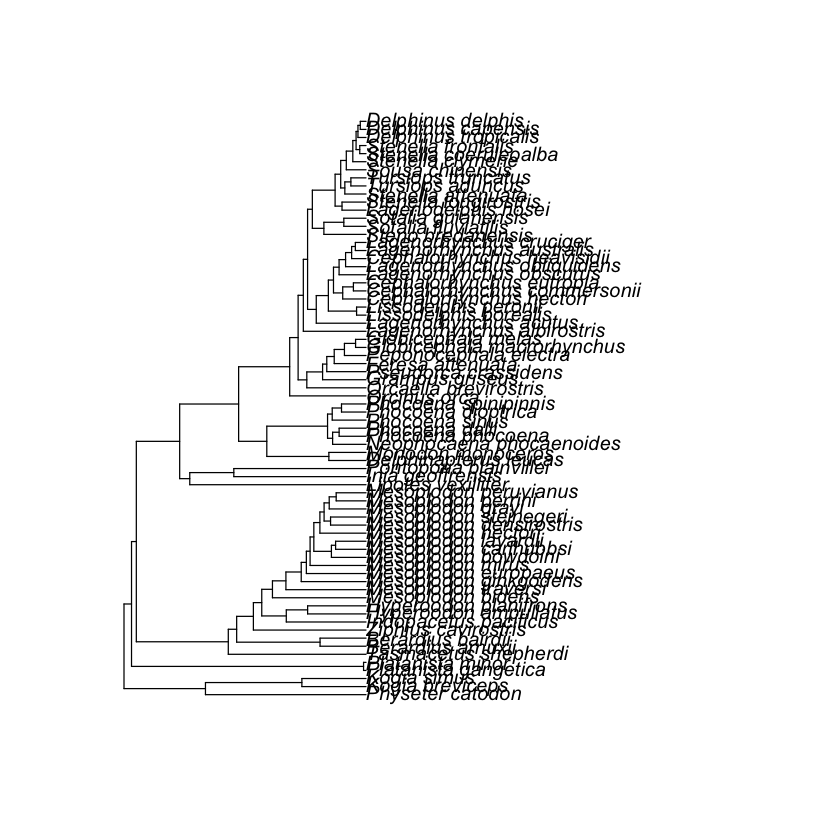

In [19]:
plot(phylo)
plot(subtree1)
plot(subtree2)

In [87]:
write.csv(branching.times(subtree1),file='/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/cross_validation_bis/branching_times_subtree1.csv',row.names = FALSE)
write.csv(branching.times(subtree2),file='/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/cross_validation_bis/branching_times_subtree2.csv',row.names = FALSE)
write.csv(branching.times(Cetacea),file='/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/cross_validation_bis/branching_times_cetacea.csv',row.names = FALSE)

nblin1 <- count_lineages_through_time(subtree1,Ntimes=150, regular_grid=TRUE )
nblin2 <- count_lineages_through_time(subtree2,Ntimes=150, regular_grid=TRUE )
nblincetacea <- count_lineages_through_time(Cetacea,Ntimes=150, regular_grid=TRUE )
write.csv(nblin1$lineage,file='/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/cross_validation_bis/LTT1.csv',row.names = FALSE)
write.csv(nblin2$lineage,file='/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/cross_validation_bis/LTT2.csv',row.names = FALSE)
write.csv(nblincetacea$lineage,file='/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/cross_validation_bis/LTTcetacea.csv',row.names = FALSE)
write.csv(nblin1$times,file='/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/cross_validation_bis/times1.csv',row.names = FALSE)
write.csv(nblin2$times,file='/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/cross_validation_bis/times2.csv',row.names = FALSE)

Creating cross validation subtrees : 

In [7]:
f<-0.8
B<-5
frac_t <- (1/B)
Tests_tips <- vector("list", length = B)
Training_tips <- vector("list", length = B)
nbtips<-Ntip(Cetacea)
tips <- c(Cetacea[["tip.label"]])

S_L <- vector("list", length = B)
S_T <- vector("list", length = B)
fracs_t <- vector("list", length = B)
fracs_l <- vector("list", length = B)
LTT_learning <- vector("list", length = B)
LTT_test <- vector("list", length = B)
T_test_LTT <- vector("list", length = B)
T_learning_LTT <- vector("list", length = B)
tree_learning  <- c()
tree_test <- c()
Tests_tips <-  vector("list", length = B)
Training_tips <- vector("list", length = B)

tot_time <- max(branching.times(Cetacea))


for (b in 1:(B-1)){
  test_tipsb <-  list(sample(tips,ceiling(frac_t*nbtips)))
  Tests_tips[b] <- test_tipsb
  Training_tips[b] <- list(c(Cetacea[["tip.label"]])[!(c(Cetacea[["tip.label"]]) %in% test_tipsb[[1]])])
  fracs_t[b] <- f * length(Tests_tips[b][[1]])/length(c(Cetacea[["tip.label"]]))
  fracs_l[b] <- f *  length(Training_tips[b][[1]])/length(c(Cetacea[["tip.label"]]))
  tips <- tips[!(tips %in% test_tipsb[[1]])]
  print(length(tips))
}

Tests_tips[B] <- list(tips)
Training_tips[B] <- list(c(Cetacea[["tip.label"]])[!(c(Cetacea[["tip.label"]]) %in% Tests_tips[B][[1]])])

fracs_t[B] <- f * length(Tests_tips[B][[1]])/length(c(Cetacea[["tip.label"]]))
fracs_l[B] <- f *  length(Training_tips[B][[1]])/length(c(Cetacea[["tip.label"]]))



[1] 69
[1] 51
[1] 33
[1] 15


In [8]:

for (b in 1:B){
  test_tips <- Tests_tips[b][[1]] #1/5ieme des tips 
  training_tips <- Training_tips[b][[1]] #4/5e restants 
  
  if(length(intersect(test_tips,training_tips))>0 || length(test_tips)+ length(training_tips) != nbtips ) {
    print("error")
  } 

  test_subtree_b <- force.ultrametric(keep.tip(Cetacea, test_tips))
  learning_subtree_b <- force.ultrametric(keep.tip(Cetacea, training_tips))
  
  tree_test <- append(tree_test,test_subtree_b)
  tree_learning <- append(tree_learning, learning_subtree_b)
  
  S_T[b] <- list(branching.times(test_subtree_b))
  length(S_T[b][[1]]) <- length(branching.times(Cetacea))
  S_L[b] <- list(branching.times(learning_subtree_b))
  length(S_L[b][[1]]) <- length(branching.times(Cetacea))
  

  Nb_lin_test <- count_lineages_through_time(test_subtree_b,Ntimes=150, regular_grid=TRUE )
  Nb_lin_learn <- count_lineages_through_time(learning_subtree_b,Ntimes=150, regular_grid=TRUE)
  LTT_learning[b] <- list(Nb_lin_learn$lineages)
  LTT_test[b] <- list(Nb_lin_test$lineages)

  
  T_test_LTT[b] <- list(Nb_lin_learn$times)
  T_learning_LTT[b] <- list(Nb_lin_test$times)
  
}


write.csv(branching.times(Cetacea),file='/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/branching_times.csv',row.names = FALSE)
write.csv(S_L,file='/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/branching_times_learning_subtrees.csv')
write.csv(S_T,file='/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/branching_times_test_subtrees.csv')
write.csv(LTT_learning,file='/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/LTT_learning.csv',row.names = FALSE)
write.csv(LTT_test,file='/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/LTT_test.csv',row.names = FALSE)
write.csv(T_test_LTT, file = '/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/T_test_LTT.csv', row.names=FALSE)
write.csv(T_learning_LTT, file = '/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/T_learn_LTT.csv', row.names=FALSE)

write.csv(fracs_t,file='/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/frac_t.csv',row.names = FALSE)
write.csv(fracs_l,file='/Users/jeanv./Desktop/stage-cladogenese/Code/Code-python/data/frac_l.csv',row.names = FALSE)


***************************************************************
*                          Note:                              *
*    force.ultrametric does not include a formal method to    *
*    ultrametricize a tree & should only be used to coerce    *
*   a phylogeny that fails is.ultramtric due to rounding --   *
*    not as a substitute for formal rate-smoothing methods.   *
***************************************************************
***************************************************************
*                          Note:                              *
*    force.ultrametric does not include a formal method to    *
*    ultrametricize a tree & should only be used to coerce    *
*   a phylogeny that fails is.ultramtric due to rounding --   *
*    not as a substitute for formal rate-smoothing methods.   *
***************************************************************
***************************************************************
*                          Note:        